## Dask Arrays

In [1]:
%%time

import numpy as np

np_ones = np.ones((1000, 1000, 1000))

CPU times: user 1.86 s, sys: 2.21 s, total: 4.07 s
Wall time: 4.35 s


In [3]:
%%time

import dask.array as da

da_ones = da.ones((1000, 1000, 1000))

CPU times: user 677 µs, sys: 12 µs, total: 689 µs
Wall time: 696 µs


In [3]:
da_ones.shape

(100000, 1000, 1000)

<br><br>

## Dask DataFrames

In [8]:
import pandas as pd
from datetime import datetime

- Create 10 CSV files, each has around 1GB

In [53]:
for year in np.arange(2010, 2020):
    dates = pd.date_range(
        start=datetime(year=year, month=1, day=1),
        end=datetime(year=year, month=12, day=31),
        freq='S'
    )
    df = pd.DataFrame()
    df['Date'] = dates
    for i in range(5):
        df[f'X{i}'] = np.random.randint(low=0, high=100, size=len(df))
        
    df.to_csv(f'data/{year}.csv', index=False)

- List all of them:

In [54]:
!ls data/

2010.csv 2012.csv 2014.csv 2016.csv 2018.csv
2011.csv 2013.csv 2015.csv 2017.csv 2019.csv


<br>

### Pandas (Single dataset)

In [55]:
%%time

df = pd.read_csv('data/2010.csv', parse_dates=['Date'])
avg = df.groupby(by=df['Date'].dt.month).sum()

CPU times: user 26.5 s, sys: 9.7 s, total: 36.2 s
Wall time: 42 s


<br>

### Pandas (Multiple datasets)

In [56]:
import glob

In [ ]:
%%time

all_files = glob.glob('data/*.csv')
dfs = []

for fname in all_files:
    dfs.append(pd.read_csv(fname, parse_dates=['Date']))
    
df = pd.concat(dfs, axis=0)
agg = df.groupby(by=df['Date'].dt.year).sum()

<br><br>

### Dask DataFrames

In [1]:
import dask.dataframe as dd

In [2]:
%%time

df = dd.read_csv('data/*.csv', parse_dates=['Date'])
agg = df.groupby(by=df['Date'].dt.year).sum().compute()

CPU times: user 5min 3s, sys: 1min 11s, total: 6min 15s
Wall time: 3min 41s


<br><br>

## Parallel processing with Dask

In [1]:
import time
import dask
import math
from dask import delayed, compute

In [9]:
%%time

def cube(number: int) -> int:
    print(f'cube({number}) called!')
    time.sleep(1)
    return number ** 3

def multiply(items: list) -> int:
    print(f'multiply([{items}]) called!')
    return math.prod(items)

numbers = [1, 2, 3, 4, 5]
graph = multiply([cube(num) for num in numbers])
print(f'Total = {graph}')

cube(1) called!
cube(2) called!
cube(3) called!
cube(4) called!
cube(5) called!
multiply([[1, 8, 27, 64, 125]]) called!
Total = 1728000
CPU times: user 8.04 ms, sys: 4 ms, total: 12 ms
Wall time: 5.02 s


In [10]:
%%time

@delayed
def cube(number: int) -> int:
    print(f'cube({number}) called!')
    time.sleep(1)
    return number ** 3

@delayed
def multiply(items: list) -> int:
    print(f'multiply([{items}]) called!')
    return math.prod(items)

numbers = [1, 2, 3, 4, 5]
graph = multiply([cube(num) for num in numbers])
print(f'Total = {graph.compute()}')

cube(3) called!cube(2) called!cube(4) called!

cube(1) called!
cube(5) called!

multiply([[1, 8, 27, 64, 125]]) called!
Total = 1728000
CPU times: user 6.37 ms, sys: 5.4 ms, total: 11.8 ms
Wall time: 1.01 s


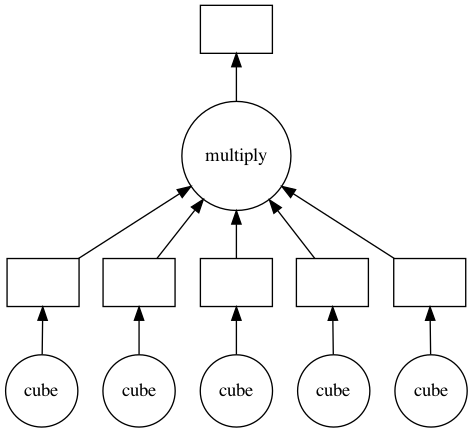

In [11]:
graph.visualize()